# Face Recognition

### importing data


In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path


im = Image.open('./Data/f1v1e1-300x400.gif')
img = np.array(im.getdata())


#plt.gray() 
#plt.matshow(img) 
#plt.show()


In [2]:
imgs = []
path = "./Data"
valid_images = [".gif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))
    
#Converting images into numpy data arrays
for i in range(len(imgs)):
    imgs[i] = np.array(imgs[i].getdata())

Images have the size of 300*400 

<Figure size 432x288 with 0 Axes>

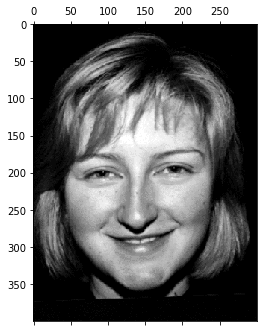

In [3]:
plt.figure()
plt.gray()

h = 400 #height
w = 300 #width

plt.matshow(imgs[1].reshape(h,w)) 

plt.show()

## Preparing the data

In [4]:

    
#Image matrix
images = np.array(imgs) 


#Creating the data class target
#the data images are 32 groups each one contains 6 face positions
y = []
k = 1
for i in range(1,33):
    for j in range(6):
        y.append(k)
    k = k+1
    
    
#Target Vector  
y = np.array(y)



In [5]:
images.shape

(192, 120000)

## Spliting data (Train , Test)

In [6]:
nb_img = len(imgs)

X_train = []
Y_train =[]

X_test = []
Y_test = []



for i in range(nb_img):
    if (i-2)%6 == 0:
        X_test.append(imgs[i])
        Y_test.append(y[i])
    else:
        X_train.append(imgs[i])
        Y_train.append(y[i])

X_train = np.array(X_train)     
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In our data each image is represented as a row in the matrix and iin order to use the PCA function and scikit learn library we need to represent images as a colone, to do so we just need to apply the transpose to our images matrix.

In [7]:
#X_train = X_train.T


#X_test = X_test.T


## Calculate the eigenfaces

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150,svd_solver='randomized')
pca.fit(X_train)
print(sum(pca.explained_variance_ratio_))
n_components = 150

eigenfaces = pca.components_.reshape((n_components, h, w))


0.9985959978681449


### Variance Ratio

In [9]:
print(pca.explained_variance_ratio_)

[0.1402813  0.1018217  0.07913778 0.0483857  0.03708241 0.0353672
 0.02939946 0.024193   0.02214827 0.02160474 0.02053615 0.01545401
 0.01496282 0.01325833 0.01316704 0.0121939  0.01176877 0.01132139
 0.01018042 0.00989824 0.00978166 0.00919421 0.00897463 0.0086182
 0.00795152 0.00762768 0.00743005 0.00697472 0.00639931 0.00622166
 0.00606946 0.00599904 0.00571374 0.00553264 0.0053693  0.00532865
 0.0049382  0.00493312 0.00469057 0.00458066 0.00451587 0.0043414
 0.00427201 0.00418409 0.00416778 0.0039177  0.00383184 0.00375347
 0.00359445 0.0035017  0.00346646 0.00338952 0.00319717 0.00316064
 0.00308004 0.0030098  0.00299034 0.00294644 0.00283429 0.00274209
 0.00270334 0.0026463  0.00260665 0.00252983 0.00249394 0.0024348
 0.00241227 0.00233753 0.002279   0.00224882 0.00219335 0.00215345
 0.00210368 0.00204338 0.00203076 0.00201737 0.00196552 0.00190915
 0.00189182 0.00185783 0.00183298 0.00180809 0.00178831 0.00175597
 0.0017403  0.00171376 0.00169838 0.00168611 0.00164227 0.00163479

In [10]:
print(sum(pca.explained_variance_ratio_))

0.9985959978681449


150 eigenfaces are conserving 99% of the information 

### Ploting one of the eigenfaces

<Figure size 432x288 with 0 Axes>

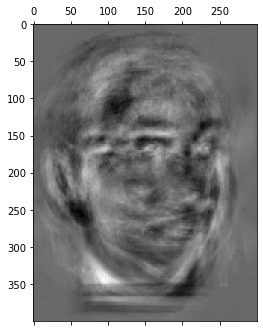

In [11]:
plt.figure()
plt.gray()
plt.matshow(eigenfaces[21].reshape(h,w)) 
plt.show()

### Projecting the input data on the eigenfaces orthonormal basis

In [12]:
X_train_acp = pca.transform(X_train)
print(X_train.shape)
print(X_train_acp.shape)

(160, 120000)
(160, 150)


## Creating and training the SVC model

In [13]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001)
svc_model.fit(X_train_acp,Y_train)

SVC(gamma=0.001)

## Validating the model

In [14]:
X_test_acp = pca.transform(X_test)
Y_predicted = svc_model.predict(X_test_acp)
print("The accuracy of the Gaussian Naive Bayes algorithm is : ")
print(svc_model.score(X_test_acp,Y_test))



The accuracy of the Gaussian Naive Bayes algorithm is : 
0.03125


In [15]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(Y_test, Y_predicted ))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00    

C:\Users\Mvox\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


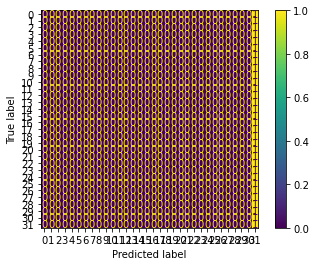

In [16]:

confusion_matrix(Y_test, Y_predicted)

confusion_matrix = confusion_matrix(Y_test, Y_predicted)
#plt.figure(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

disp.plot()

plt.show()